# Integer linear programming experiments for vertex cover problems
// TODO Simple description of the project to add.

First of all, import the Python libraries used in the process of data analysis.

In [14]:
import pandas as pd
import numpy
import pyvis
import matplotlib.pyplot as plt
import params as pa
from mpl_toolkits import mplot3d

Import experimental data from the corresponding csv files. The data are splitted over multiple csv file, one for each graph class studied. The first three rows of one of these files are displayed below, to give an idea of the file structure.

In [10]:
gnp_data = pd.read_csv('data/gnp.csv')
bag_data = pd.read_csv('data/bag.csv')
rrg_data = pd.read_csv('data/rrg.csv')
wsg_data = pd.read_csv('data/wsg.csv')
gnp_data.head(3)

,name,time,ticks,sol_nodes,gap,time_lim,nodes,edges,cnnct_cmp,avg_clust,std_dev_clust,radius,diameter
0,gnp_000,0.39,99.51,69.0,0.0,False,100,508,1,0.113342,0.053480,3,4
1,gnp_001,0.45,100.66,68.0,0.0,False,100,484,1,0.097705,0.047745,3,4
2,gnp_002,0.52,138.64,69.0,0.0,False,100,487,1,0.083568,0.043205,3,4


## Erdős–Rényi graphs
This chapter reports a detailed analysis of a particular subset of graphs named Erdős–Rényi graphs (also known as binomial graphs) generated using the `gnp_random_graph()` method of the Networkx package. With this method, the inclusion of each edge of the graph depends on a parametric probability *p*, indipendent from every other edge of the graph. 

First of all, plot the correlation between the solution time (y axis) versus the average clustering index of the graph (x axis). Graphs with different sizes are labeled with different colors. 

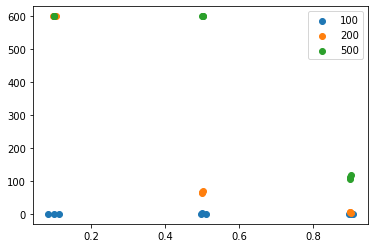

In [25]:
for i in range(len(pa.GNP_N)):
    filter = gnp_data['nodes']==pa.GNP_N[i]
    data = gnp_data[filter]
    plt.scatter(data['avg_clust'], data['time'], label=str(pa.GNP_N[i]))
plt.legend(loc="upper right")
plt.show()

Try to find a correlation plotting together the size of the problem, the average clustering coefficient of the graph (x and y axis) and the solution time.

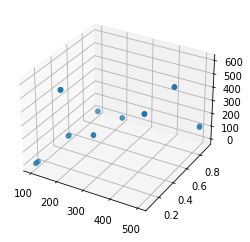

In [29]:
ax = plt.axes(projection='3d')
zdata = gnp_data['time']
xdata = gnp_data['nodes']
ydata = gnp_data['avg_clust']
ax.scatter3D(xdata, ydata, zdata);

## Regular graphs
